In [18]:
import numpy as np
import pandas as pd
import pandas_profiling

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
import matplotlib
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn import linear_model
from yellowbrick.regressor import AlphaSelection
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import statistics
from statistics import mean
from statistics import stdev
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [19]:
url = '/Users/VishalDubey/Vishal/College/polsci189fs/FF Project/Data/allData.csv'
df = pd.read_csv(url)
data = df
data.head()


,Unnamed: 0,Unnamed: 0.1,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick,yr2
0,119,667,Ladell Betts,RB,70,220,4.62,38.0,23.000000,116.0,7.060000,4.060000,2002,BettLa00,9.0,Washington Redskins,2.0,56.0,50.0
1,120,672,Deion Branch,WR,69,191,4.47,36.0,18.898734,117.0,6.710000,3.780000,2002,BranDe00,17.0,New England Patriots,2.0,65.0,60.0
2,121,680,Antonio Bryant,WR,73,188,4.57,37.0,18.898734,121.0,7.002361,4.244398,2002,BryaAn00,14.0,Dallas Cowboys,2.0,63.0,110.0
3,122,685,Reche Caldwell,WR,72,194,4.53,41.5,18.898734,130.0,7.000000,4.100000,2002,CaldRe00,8.0,San Diego Chargers,2.0,48.0,40.0
4,123,689,David Carr,QB,75,223,4.67,35.0,18.898734,108.0,7.050000,4.280000,2002,CarrDa00,25.0,Houston Texans,1.0,1.0,139.0


In [20]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round,Pick,yr2
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,634.609065,3159.716714,73.120397,218.719547,4.571792,34.794014,18.898734,118.647378,7.002361,4.244398,2009.208215,9.830028,3.382436,96.961756,52.216714
std,292.202014,1408.384919,2.825609,23.011020,0.168066,2.872071,3.667753,5.605499,0.176839,0.129835,4.294214,9.466447,1.837645,65.805365,58.499704
min,119.000000,667.000000,66.000000,165.000000,4.220000,25.500000,7.000000,100.000000,6.500000,3.780000,2002.000000,-4.000000,1.000000,1.000000,-4.000000
25%,382.250000,1984.750000,71.000000,202.000000,4.450000,33.125000,18.000000,116.000000,6.930000,4.190000,2006.000000,2.000000,2.000000,43.250000,8.000000
50%,652.500000,3229.500000,73.000000,217.000000,4.540000,34.794014,18.898734,118.647378,7.002361,4.244398,2009.000000,7.000000,3.000000,88.000000,33.000000
75%,880.750000,4331.000000,75.000000,232.000000,4.670000,36.000000,19.000000,122.000000,7.050000,4.280000,2013.000000,15.000000,5.000000,142.750000,75.000000
max,1123.000000,5544.000000,80.000000,275.000000,5.240000,45.000000,35.000000,139.000000,7.860000,4.820000,2016.000000,51.000000,7.000000,257.000000,375.000000


,medv,Value
0,mean,52.216714
1,median,33.000000


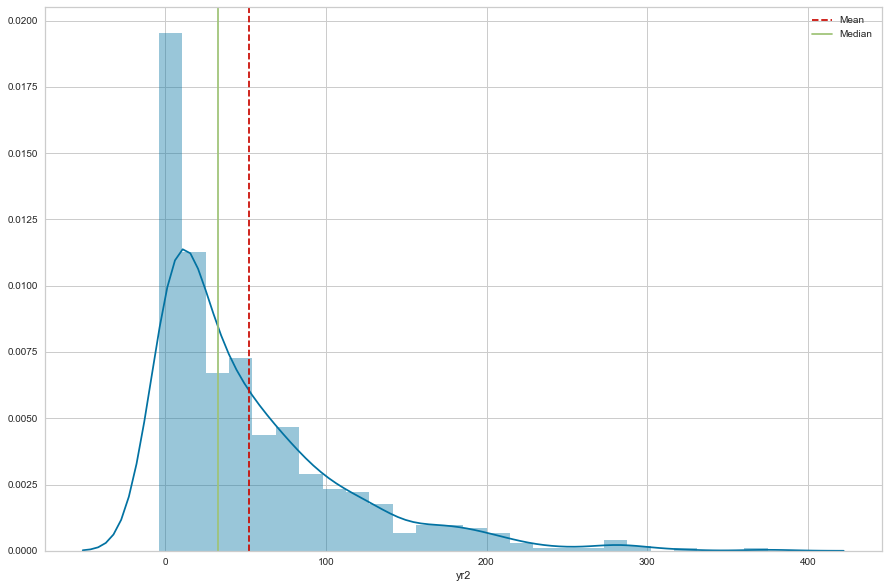

In [27]:
#describes values chosen 
vals = 'Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,AV,Round,Pick'.split(',')
#predictors
X = data[vals].values

#target variable
y = data['yr2'].values

#Plot creation
plt.figure(figsize=(15,10))
plt.tight_layout()

seabornInstance.distplot(data['yr2'])
mean=data['yr2'].mean()
median=data['yr2'].median()

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

mmm = pd.DataFrame({'medv': ['mean', 'median'], 'Value': [mean, median]})
display(mmm)

In [28]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

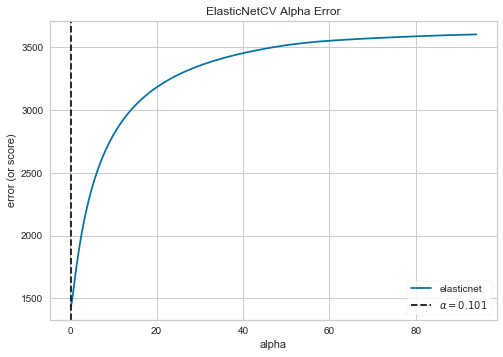

In [29]:
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=3, copy_X=True, verbose=0, n_jobs=None)
ElasticVisualizer = AlphaSelection(ElasticModel)
ElasticVisualizer.fit(X_train, y_train)
ElasticVisualizer.show()

In [30]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
clf = linear_model.ElasticNet(alpha=.028, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

coefs = pd.DataFrame({ 'Variables': vals, 'Coefficients': clf.coef_})
display(coefs)

print("Intercept: " + str(clf.intercept_))

ElasticNet Predict with transformations:


,Variables,Coefficients
0,Ht,-3.786155
1,Wt,4.839384
2,Forty,1.539920
3,Vertical,-2.764654
4,BenchReps,-2.770768
5,BroadJump,3.026860
6,Cone,-1.193782
7,Shuttle,0.225152
8,AV,44.342314
9,Round,5.774518


Intercept: 53.8102836879431


In [31]:
#Displays Residuals in Tabular Format
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dfElastic.head()

,Actual,Predicted
0,110.0,88.250056
1,217.0,129.605445
2,28.0,28.409883
3,60.0,100.343394
4,4.0,6.722734


Elastic Graph


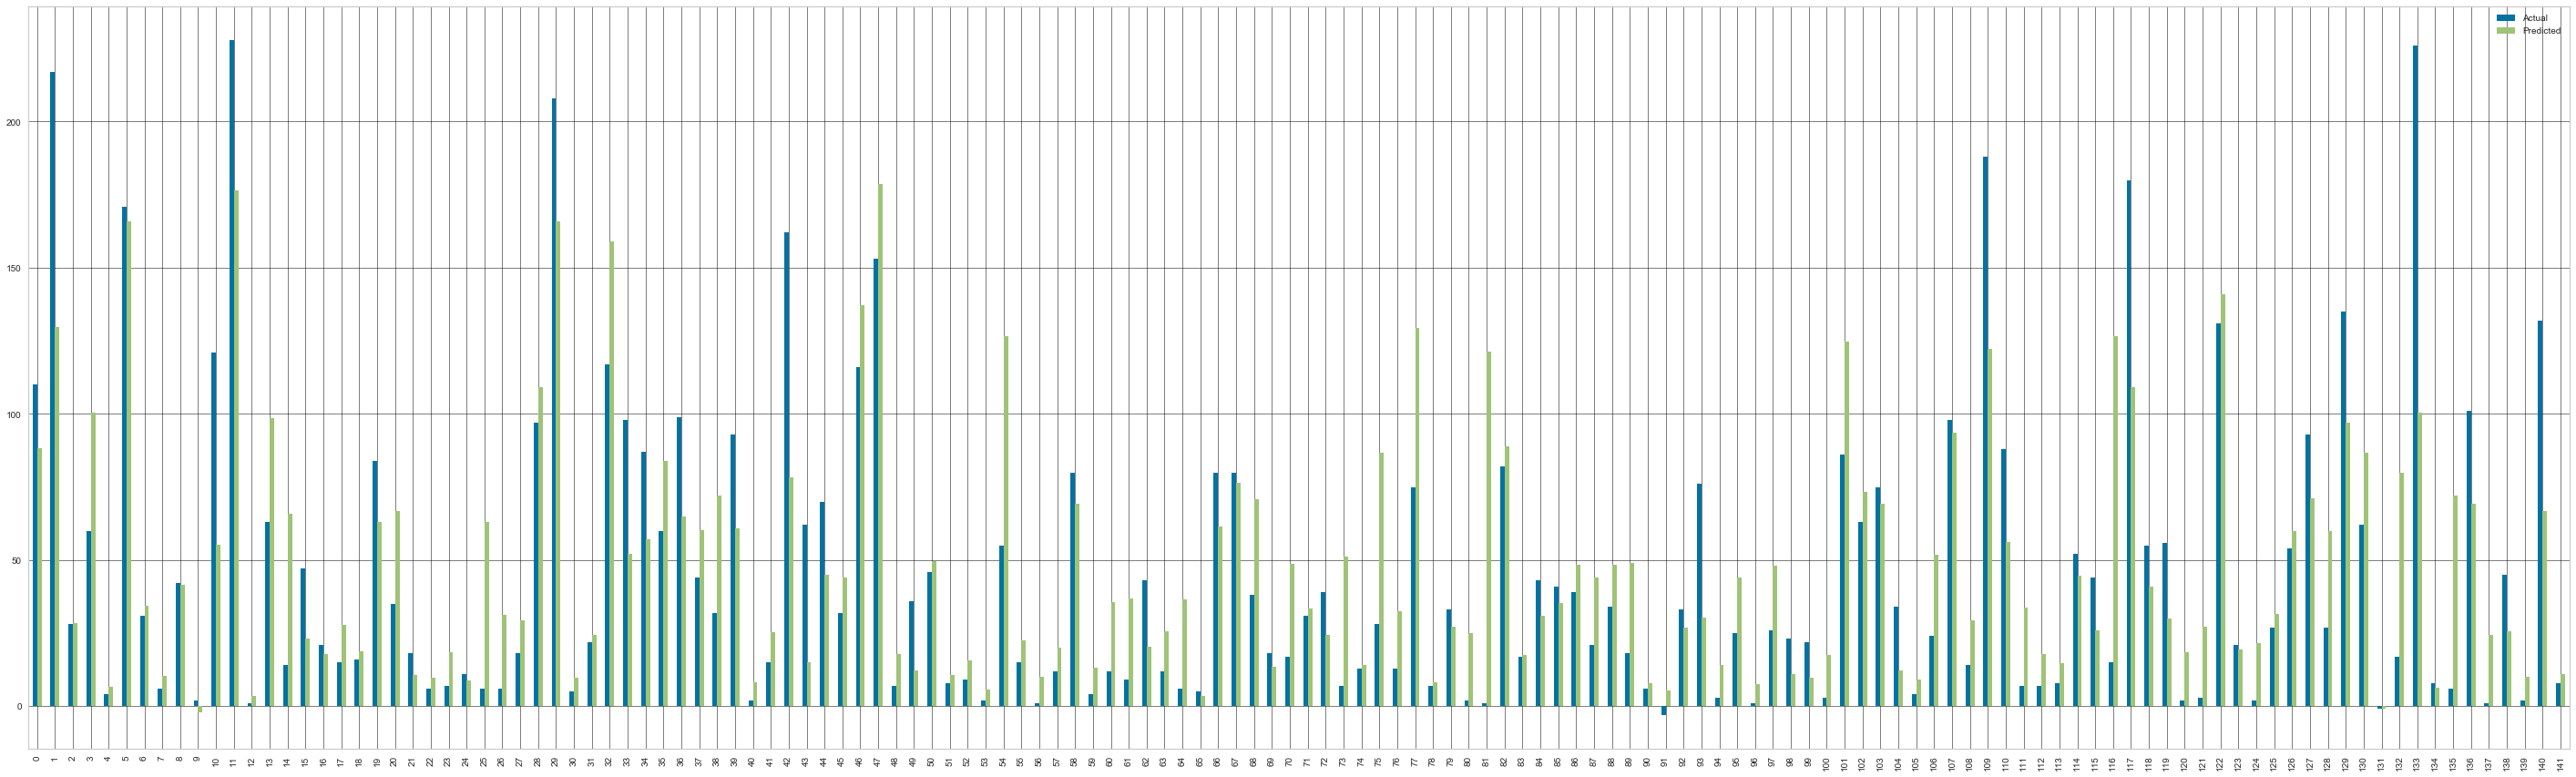

In [32]:
#Displays Residuals in Graphical Format
print("Elastic Graph")
dfElastic.plot(kind='bar',figsize=(50,15))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 22.96357551108231
Mean Squared Error: 1089.8523708841078
Root Mean Squared Error: 33.012912184236455


In [57]:
pca = PCA(1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

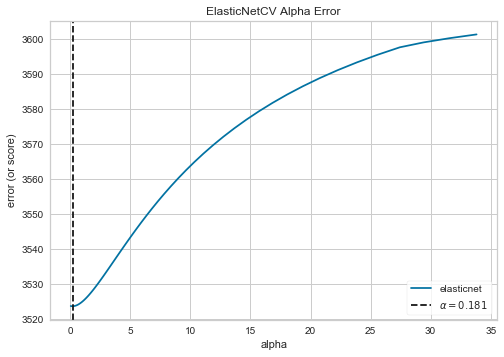

In [58]:
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=3, copy_X=True, verbose=0, n_jobs=None)
ElasticVisualizer = AlphaSelection(ElasticModel)
ElasticVisualizer.fit(X_train, y_train)
ElasticVisualizer.show()

In [59]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
clf = linear_model.ElasticNet(alpha=.028, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ElasticNet Predict with transformations:


In [60]:
#Displays Residuals in Tabular Format
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

#dfElastic.head()
print(clf.coef_)

[-4.93768643]


In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 39.71774846792333
Mean Squared Error: 2537.0854858472644
Root Mean Squared Error: 50.369489632586756


In [62]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round,Pick,yr2
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,634.609065,3159.716714,73.120397,218.719547,4.571792,34.794014,18.898734,118.647378,7.002361,4.244398,2009.208215,9.830028,3.382436,96.961756,52.216714
std,292.202014,1408.384919,2.825609,23.011020,0.168066,2.872071,3.667753,5.605499,0.176839,0.129835,4.294214,9.466447,1.837645,65.805365,58.499704
min,119.000000,667.000000,66.000000,165.000000,4.220000,25.500000,7.000000,100.000000,6.500000,3.780000,2002.000000,-4.000000,1.000000,1.000000,-4.000000
25%,382.250000,1984.750000,71.000000,202.000000,4.450000,33.125000,18.000000,116.000000,6.930000,4.190000,2006.000000,2.000000,2.000000,43.250000,8.000000
50%,652.500000,3229.500000,73.000000,217.000000,4.540000,34.794014,18.898734,118.647378,7.002361,4.244398,2009.000000,7.000000,3.000000,88.000000,33.000000
75%,880.750000,4331.000000,75.000000,232.000000,4.670000,36.000000,19.000000,122.000000,7.050000,4.280000,2013.000000,15.000000,5.000000,142.750000,75.000000
max,1123.000000,5544.000000,80.000000,275.000000,5.240000,45.000000,35.000000,139.000000,7.860000,4.820000,2016.000000,51.000000,7.000000,257.000000,375.000000
